# Notebook for Running Calculations

In [1]:
import xgcm
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from xhistogram.xarray import histogram
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

---

## Calculations (all ensemble members)

In [4]:
# for index in range(24, 31):
#     if index < 10:
#         indexlabel = str(0)+str(index)
#     else:
#         indexlabel = str(index)
        
#     directory = '/local/ss23/GFDL_LEs/OCN/OMEGA_ARAG/RCP85/'
#     filename = 'omega_arag_k11_ens1'+indexlabel+'_1x1_1950_2100.nc'
#     oa_path = directory+filename
#     ds = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
#                                          'YT_OCEAN': 'yt_ocean',
#                                          'TIME': 'time',
#                                          'OMEGA_ARAG': 'omega_arag'})
    
    
#     # -----------------------------------------------------------

#     # Calculate the time-mean Omega Arag throughout the simulation
#     da_oa_annual = ds.omega_arag.groupby('time.year').mean(dim='time', skipna=True).squeeze()

#     startyear = 1950
#     endyear = 2100
#     interval = 10  # plot decadal contours
#     span = interval//2

#     da_oa_mean = da_oa_annual.copy() # annual averages from 1950-2100
#     # da_oa_mean moving averages span from 1955-2095
# #     da_oa_mean = moving_avg(da_oa_annual, startyear, endyear, interval)

    
#     # -----------------------------------------------------------


#     # Definte projection transformations and coordiantes
#     crs = ccrs.Robinson(central_longitude=180)
#     src=ccrs.PlateCarree()
#     lon = ds.xt_ocean.data
#     lat = ds.yt_ocean.data


#     # Create levels array to isolate undersaturation threshold
#     clevs=[1]

#     # Create list of colors and legend for plots
#     colors = ['hotpink','magenta','darkviolet','purple',
#               'darkblue','blue','dodgerblue','turquoise',
#               'limegreen','lime','gold','darkorange',
#               'orangered','red','firebrick','maroon']

#     # (for decadal mean)
#     # colors = ['magenta','darkviolet','purple',
#     #           'darkblue','blue','dodgerblue','turquoise',
#     #           'limegreen','lime','gold','darkorange',
#     #           'orangered','red','firebrick','maroon']

#     num_contours = len(da_oa_mean)
#     num_colors = len(colors)
#     year=startyear+interval  # start in 1950
#     legend_years = []
#     c = 0
#     for i in range(span, num_contours, interval):
#         element = Patch(facecolor=colors[c], label=str(year))
#         legend_years.append(element)
#         year+=interval
#         c+=1

#     # -----------------------------------------------------------
#     # Calculate Velocities at undersaturation border for every 2 years
#     fig, ax = plt.subplots(figsize=[16,10],
#                                    subplot_kw={'projection':crs})

#     # Extract points from contour line segments for each year
#     list_xpoints = []  # list contianing lists of x points for each year
#     list_ypoints = []  # list contianing lists of y points for each year
#     for i in range(0, num_contours):
#         cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
#                         colors=colors[i%num_colors],transform=src)

#         segments = cs.allsegs[0]
#         num_segs = len(segments)

#         xpoints = []  # to track multiple paths within each year
#         ypoints = []
#         for j in range(num_segs):
#             x = segments[j][:,0].tolist()  # convert to list to be easily concatenated
#             y = segments[j][:,1].tolist()
#             for p in x:
#                 xpoints.append(p)
#             for p in y:
#                 ypoints.append(p)
#         list_xpoints.append(xpoints)  # add list of x points for each year
#         list_ypoints.append(ypoints)  # add list of y points for each year

#     ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
#                  fontsize=22)
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
#     ax.set_global()

#     # -----------------------------------------------------------

#     # For each contour, compute the minimum distance to the contour at
#     # the end of the interval

#     # Create parallel arrays of list to hold lists of directions and vectors for each decade
#     list_vector_dx = []  # change in x
#     list_vector_dy = []  # change in y
#     list_vector_magnitude = []  # distance to nearest points

#     for i in range(0, num_contours-interval):
#         vector_dx = []  # change in x for decade
#         vector_dy = []  # change in y for decade
#         vector_magnitude = []  # vector magnitude for year
#         xpoints = list_xpoints[i]  # x coords for year
#         ypoints = list_ypoints[i]  # y coords for year
#         # For each point, find min dist and closest point on contour 
#         # at the end of the time interval (one decade later)
#         num_points = len(xpoints)
#         for p in range(num_points):
#             xp = xpoints[p] # x value along contour
#             yp = ypoints[p] # y value along contour
#             x,y,dx,dy,mindist = min_dist(xp,yp,
#                                          list_xpoints[i+interval],
#                                          list_ypoints[i+interval],
#                                         da_oa_mean[i].data)
#             # maintain lists of x and y vectors
#     #         vector_dx.append(dx/1000)
#     #         vector_dy.append(dy/1000)
#             vector_magnitude.append(mindist/1000)  # dist magnitude

#     #     list_vector_dx.append(vector_dx)
#     #     list_vector_dy.append(vector_dy)
#         list_vector_magnitude.append(vector_magnitude)

        
#     # -----------------------------------------------------------  
        
#     # Clean list of vector magnitudes to eliminate NaN values
#     cleaned_vector_magnitude = []  # distances with NaN values filtered out
#     cleaned_list_xpoints = []
#     cleaned_list_ypoints = []

#     vel_data_range = num_contours-interval
#     max_len = 0
#     for i in range(0, vel_data_range):
#         xpoints = list_xpoints[i]   # get all x and y points to filter in parallel
#         ypoints = list_ypoints[i]

#         cleaned_magnitude = []
#         cleaned_xpoints = []
#         cleaned_ypoints = []
#         vector_magnitude = list_vector_magnitude[i]
#         num_pts = len(list_vector_magnitude[i])

#         for p in range(num_pts):
#             val = vector_magnitude[p]
#             # add finite values to cleaned list of magnitudes
#             if (val == val):  # use trick that np.nan != np.nan
#                 cleaned_magnitude.append(val)
#                 cleaned_xpoints.append(xpoints[p])
#                 cleaned_ypoints.append(ypoints[p])

#         cleaned_pts = len(cleaned_magnitude)
#         if cleaned_pts > max_len:
#             max_len = cleaned_pts

#         cleaned_vector_magnitude.append(cleaned_magnitude)
#         cleaned_list_xpoints.append(cleaned_xpoints)
#         cleaned_list_ypoints.append(cleaned_ypoints)

#     for i in range(0, vel_data_range):
#         cleaned_magnitude = cleaned_vector_magnitude[i]
#         cleaned_xpoints = cleaned_list_xpoints[i]
#         cleaned_ypoints = cleaned_list_ypoints[i]

#         for j in range(len(cleaned_magnitude),max_len):
#             cleaned_magnitude.append(np.nan)
#             cleaned_xpoints.append(np.nan)
#             cleaned_ypoints.append(np.nan)

#     # -----------------------------------------------------------  

#     # Save precalculated dataarrays and create 3D DataArray
#     ens_name = 'ens1'+indexlabel
#     years = np.arange(1950,2091)
#     val_idx = np.arange(0,max_len)

#     # save entire ensemble member in one dataset
#     da_velocity = xr.DataArray(np.array(cleaned_vector_magnitude), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='velocity')
#     da_velocity.to_netcdf('./oa_ensemble_escvel/ens_values/'+ens_name)
    
#     da_xpoints = xr.DataArray(np.array(cleaned_list_xpoints), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='xpoints')
#     da_xpoints.to_netcdf('./oa_ensemble_escvel/ens_xcoords/'+ens_name)


#     da_ypoints = xr.DataArray(np.array(cleaned_list_ypoints), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='ypoints')
#     da_ypoints.to_netcdf('./oa_ensemble_escvel/ens_ycoords/'+ens_name)

---

---

---

## Surface k11 RCP85

In [5]:
# k11 Omega Arag for ensemble average (preprocessed)

# directory = '~/chazbpei2020/data/processed/Omega_Arag/RCP85/'
# filename = 'omega_arag_k11_ensAvg_1950_2100.nc'

directory = '/local/ss23/GFDL_LEs/OCN/OMEGA_ARAG/RCP85/'
filename = 'omega_arag_k11_ens101_1x1_1950_2100.nc'
oa_path = directory+filename
ds = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
                                     'YT_OCEAN': 'yt_ocean',
                                     'TIME': 'time',
                                     'OMEGA_ARAG': 'omega_arag'})

---

## Annual Mean Omega Arag

In [6]:
# Calculate the time-mean Omega Arag throughout the simulation
da_oa_annual = ds.omega_arag.groupby('time.year').mean(dim='time', skipna=True).squeeze()

startyear = 1950
endyear = 2100
interval = 10  # plot decadal contours
span = interval//2
    
da_oa_mean = da_oa_annual.copy() # annual averages from 1950-2100

# da_oa_mean moving averages span from 1955-2095
# da_oa_mean = moving_avg(da_oa_annual, startyear, endyear, interval)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


---

# Calculate Escape Vectors

In [17]:
# Definte projection transformations and coordiantes
crs = ccrs.Robinson(central_longitude=180)
src=ccrs.PlateCarree()
lon = ds.xt_ocean.data
lat = ds.yt_ocean.data


# Create levels array to isolate undersaturation threshold
clevs=[1]

# Create list of colors and legend for plots
colors = ['hotpink','magenta','darkviolet','purple',
          'darkblue','blue','dodgerblue','turquoise',
          'limegreen','lime','gold','darkorange',
          'orangered','red','firebrick','maroon']

# (for decadal mean)
# colors = ['magenta','darkviolet','purple',
#           'darkblue','blue','dodgerblue','turquoise',
#           'limegreen','lime','gold','darkorange',
#           'orangered','red','firebrick','maroon']

num_contours = len(da_oa_mean)
num_colors = len(colors)
year=startyear+interval  # start in 1950
legend_years = []
c = 0
for i in range(span, num_contours, interval):
    element = Patch(facecolor=colors[c], label=str(year))
    legend_years.append(element)
    year+=interval
    c+=1

## Plot undersaturation borders

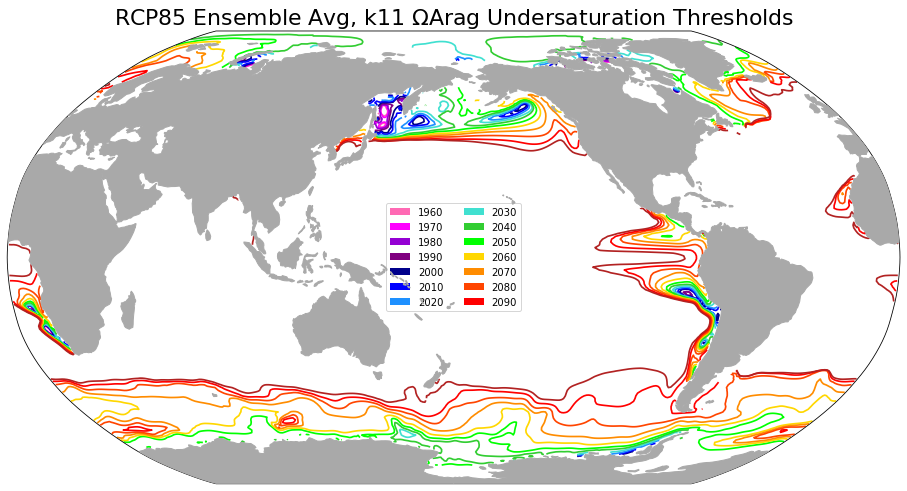

In [18]:
# Plot Velocities at undersaturation border for every 2 years
fig, ax = plt.subplots(figsize=[16,10],
                               subplot_kw={'projection':crs})
    
# Plot contours for each decade
c = 0
for i in range(0, num_contours, interval):
    cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
                    colors=colors[c],linewidths=1.7,transform=src)
    c += 1
    
ax.legend(handles=legend_years, loc='center',ncol=2)
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
             fontsize=22)
ax.set_global()

## Get points along contours

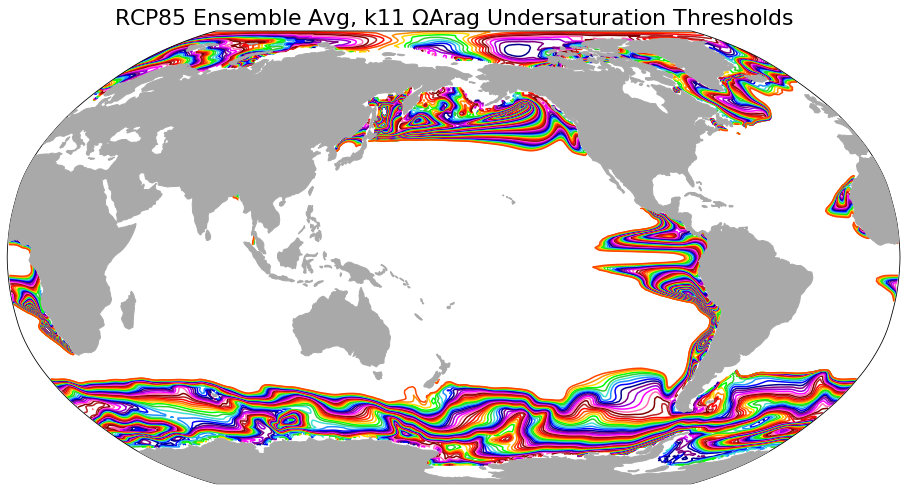

In [19]:
# Calculate Velocities at undersaturation border for every 2 years
fig, ax = plt.subplots(figsize=[16,10],
                               subplot_kw={'projection':crs})

# Extract points from contour line segments for each year
list_xpoints = []  # list contianing lists of x points for each year
list_ypoints = []  # list contianing lists of y points for each year
for i in range(0, num_contours):
    cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
                    colors=colors[i%num_colors],transform=src)

    segments = cs.allsegs[0]
    num_segs = len(segments)

    xpoints = []  # to track multiple paths within each year
    ypoints = []
    for j in range(num_segs):
        x = segments[j][:,0].tolist()  # convert to list to be easily concatenated
        y = segments[j][:,1].tolist()
        for p in x:
            xpoints.append(p)
        for p in y:
            ypoints.append(p)
    list_xpoints.append(xpoints)  # add list of x points for each year
    list_ypoints.append(ypoints)  # add list of y points for each year

ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
             fontsize=22)
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.set_global()

## Calculations

In [20]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

In [21]:
%%time
# For each contour, compute the minimum distance to the contour at
# the end of the interval

# Create parallel arrays of list to hold lists of directions and vectors for each decade
list_vector_dx = []  # change in x
list_vector_dy = []  # change in y
list_vector_magnitude = []  # distance to nearest points

for i in range(0, num_contours-interval):
    vector_dx = []  # change in x for decade
    vector_dy = []  # change in y for decade
    vector_magnitude = []  # vector magnitude for year
    xpoints = list_xpoints[i]  # x coords for year
    ypoints = list_ypoints[i]  # y coords for year
    # For each point, find min dist and closest point on contour 
    # at the end of the time interval (one decade later)
    num_points = len(xpoints)
    for p in range(num_points):
        xp = xpoints[p] # x value along contour
        yp = ypoints[p] # y value along contour
        x,y,dx,dy,mindist = min_dist(xp,yp,
                                     list_xpoints[i+interval],
                                     list_ypoints[i+interval],
                                    da_oa_mean[i].data)
        # maintain lists of x and y vectors
#         vector_dx.append(dx/1000)
#         vector_dy.append(dy/1000)
        vector_magnitude.append(mindist/1000)  # dist magnitude
        
#     list_vector_dx.append(vector_dx)
#     list_vector_dy.append(vector_dy)
    list_vector_magnitude.append(vector_magnitude)

CPU times: user 14min 48s, sys: 69.2 ms, total: 14min 48s
Wall time: 14min 48s


In [22]:
# Clean list of vector magnitudes to eliminate NaN values
cleaned_vector_magnitude = []  # distances with NaN values filtered out
cleaned_list_xpoints = []
cleaned_list_ypoints = []

vel_data_range = num_contours-interval
max_len = 0
for i in range(0, vel_data_range):
    xpoints = list_xpoints[i]   # get all x and y points to filter in parallel
    ypoints = list_ypoints[i]

    cleaned_magnitude = []
    cleaned_xpoints = []
    cleaned_ypoints = []
    vector_magnitude = list_vector_magnitude[i]
    num_pts = len(list_vector_magnitude[i])

    for p in range(num_pts):
        val = vector_magnitude[p]
        # add finite values to cleaned list of magnitudes
        if (val == val):  # use trick that np.nan != np.nan
            cleaned_magnitude.append(val)
            cleaned_xpoints.append(xpoints[p])
            cleaned_ypoints.append(ypoints[p])

    cleaned_pts = len(cleaned_magnitude)
    if cleaned_pts > max_len:
        max_len = cleaned_pts

    cleaned_vector_magnitude.append(cleaned_magnitude)
    cleaned_list_xpoints.append(cleaned_xpoints)
    cleaned_list_ypoints.append(cleaned_ypoints)

for i in range(0, vel_data_range):
    cleaned_magnitude = cleaned_vector_magnitude[i]
    cleaned_xpoints = cleaned_list_xpoints[i]
    cleaned_ypoints = cleaned_list_ypoints[i]

    for j in range(len(cleaned_magnitude),max_len):
        cleaned_magnitude.append(np.nan)
        cleaned_xpoints.append(np.nan)
        cleaned_ypoints.append(np.nan)

## Save DataArray for future use

In [24]:
# Sort out how to store arrays in parallel
# run calculation for all of tomorrow

# Save precalculated dataarrays and create 3D DataArray
ens_name = 'ens101'
years = np.arange(1950,2091)
val_idx = np.arange(0,max_len)

# save entire ensemble member in one dataset
da_velocity = xr.DataArray(np.array(cleaned_vector_magnitude), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='velocity')
da_velocity.to_netcdf('./oa_ensemble_escvel/ens_values/'+ens_name)

da_xpoints = xr.DataArray(np.array(cleaned_list_xpoints), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='xpoints')
da_xpoints.to_netcdf('./oa_ensemble_escvel/ens_xcoords/'+ens_name)


da_ypoints = xr.DataArray(np.array(cleaned_list_ypoints), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='ypoints')
da_ypoints.to_netcdf('./oa_ensemble_escvel/ens_ycoords/'+ens_name)

---

---

---

## Read and parse DataArrays

In [7]:
ensmbr_data = xr.open_dataset('./oa_ensemble_escvel/ens_values/ens101')
da_xcoords = xr.open_dataset('./oa_ensemble_escvel/ens_xcoords/ens101')
da_ycoords = xr.open_dataset('./oa_ensemble_escvel/ens_ycoords/ens101')

In [8]:
# Read in DataArray for each Ensemble
num_members = 30
list_ensmbrs_data = []
list_ensmbrs_xp = []
list_ensmbrs_yp = []
list_ensmbrs_data.append(None)  # offset so indices match ensemble number
list_ensmbrs_xp.append(None)
list_ensmbrs_yp.append(None)

for m in range(1,num_members+1):
    if m < 10:
        ens_name = 'ens10'+str(m)
    else:
        ens_name = 'ens1'+str(m)

    vel_path = './oa_ensemble_escvel/ens_values/'+ens_name
    x_path = './oa_ensemble_escvel/ens_xcoords/'+ens_name
    y_path = './oa_ensemble_escvel/ens_ycoords/'+ens_name
    
    da_velocity = xr.open_dataset(vel_path)
    da_xpoints = xr.open_dataset(x_path)
    da_ypoints = xr.open_dataset(y_path)
    
    list_ensmbrs_data.append(da_velocity)
    list_ensmbrs_xp.append(da_xpoints)
    list_ensmbrs_yp.append(da_ypoints)

In [9]:
# Clean data (filter out filler np.nan values)
list_ensmbrs_vel = []
list_ensmbrs_xpoints = []
list_ensmbrs_ypoints = []
vel_data_range = len(da_velocity.year)

# For each Ensemble member, clean the dataset
for m in range(1,num_members+1):
    cleaned_vel = []
    cleaned_xpoints = []
    cleaned_ypoints = []
    ensmbr_data = list_ensmbrs_data[m]
    ensmbr_xpoints = list_ensmbrs_xp[m]
    ensmbr_ypoints = list_ensmbrs_yp[m]
    max_len = len(ensmbr_data.val_idx)
    
    for i in range(0, vel_data_range):
        escvel = ensmbr_data.isel(year=i).velocity.data.tolist()
        xpoints = ensmbr_xpoints.isel(year=i).xpoints.data.tolist()
        ypoints = ensmbr_ypoints.isel(year=i).ypoints.data.tolist()
        nan_idx = None
        for p in range(0,max_len):
            val = escvel[p]
            if val != val:
                nan_idx = p  # track index where filler NaN values start
                break
                
        del escvel[p:]
        del xpoints[p:]
        del ypoints[p:]

        cleaned_vel.append(escvel)
        cleaned_xpoints.append(xpoints)
        cleaned_ypoints.append(ypoints)
        
    list_ensmbrs_vel.append(cleaned_vel)
    list_ensmbrs_xpoints.append(cleaned_xpoints)
    list_ensmbrs_ypoints.append(cleaned_ypoints)

In [9]:
# Read in and clean DataArray for annual ensemble average
vel_path = './oa_ensemble_escvel/ens_values/ensAvg1yr'
x_path = './oa_ensemble_escvel/ens_xcoords/ensAvg1yr'
y_path = './oa_ensemble_escvel/ens_ycoords/ensAvg1yr'
ens_annualAvg_data = xr.open_dataset(vel_path)
ens_annualAvg_xp = xr.open_dataset(x_path)
ens_annualAvg_yp = xr.open_dataset(y_path)

ens_annualAvg_vel = []
ens_annualAvg_xpoints = []
ens_annualAvg_ypoints = []
max_len = len(ens_annualAvg_data.val_idx)

for i in range(0, vel_data_range): # fewer measured years for moving avg
    escvel = ens_annualAvg_data.isel(year=i).velocity.data.tolist()
    xpoints = ens_annualAvg_xp.isel(year=i).xpoints.data.tolist()
    ypoints = ens_annualAvg_yp.isel(year=i).ypoints.data.tolist()
    nan_idx = None
    for p in range(0,max_len):
        val = escvel[p]
        if val != val:
            nan_idx = p  # track index where filler NaN values start
            break

    del escvel[p:]

    ens_annualAvg_vel.append(escvel)
    ens_annualAvg_xpoints.append(xpoints)
    ens_annualAvg_ypoints.append(ypoints)

In [10]:
# Read in and clean DataArray for 10-yr moving ensemble average
vel_path = './oa_ensemble_escvel/ens_values/ensAvg10yr'
x_path = './oa_ensemble_escvel/ens_xcoords/ensAvg10yr'
y_path = './oa_ensemble_escvel/ens_ycoords/ensAvg10yr'
ens_movingAvg_data = xr.open_dataset(vel_path)
ens_movingAvg_xp = xr.open_dataset(x_path)
ens_movingAvg_yp = xr.open_dataset(y_path)

ens_movingAvg_vel = []
ens_movingAvg_xpoints = []
ens_movingAvg_ypoints = []
max_len = len(ens_movingAvg_data.val_idx)

for i in range(0, vel_data_range-10): # fewer measured years for moving avg
    escvel = ens_movingAvg_data.isel(year=i).velocity.data.tolist()
    xpoints = ens_movingAvg_xp.isel(year=i).xpoints.data.tolist()
    ypoints = ens_movingAvg_yp.isel(year=i).ypoints.data.tolist()
    nan_idx = None
    for p in range(0,max_len):
        val = escvel[p]
        if val != val:
            nan_idx = p  # track index where filler NaN values start
            break

    del escvel[p:]

    ens_movingAvg_vel.append(escvel)
    ens_movingAvg_xpoints.append(xpoints)
    ens_movingAvg_ypoints.append(ypoints)

---

# Calculate Natural Variability for each ensemble member

In [26]:
# Calculate Natural component of variability
list_ensmbrs_nat = []
list_ensmbrs_north_nat = []
list_ensmbrs_equ_nat = []
list_ensmbrs_south_nat = []
for m in range(1,num_members+1):
    ensmbr_vel = list_ensmbrs_vel[m]
    ensmbr_xpoints = list_ensmbrs_xpoints[m]
    ensmbr_ypoints = list_ensmbrs_ypoints[m]
    num_pts = len(ensmbr_vel)
    
    
    for i in range(num_pts):
        

[[745.3757093035896,
  737.8562139523981,
  716.8229922611386,
  189.16093502792685,
  137.77178452785876,
  85.72567213908927,
  67.60960538215939,
  45.103131270271966,
  0.0,
  55.597463322279445,
  52.585364729518005,
  22.962447163315836,
  33.35847799336767,
  55.597463322278735,
  100.34277007759464,
  135.43796684774,
  158.30581681875617,
  215.8097532936407,
  33.358477993368375,
  69.64502385836037,
  143.99749054062733,
  168.71075851212132,
  155.67289730238244,
  158.54145882109458,
  178.89157531680806,
  192.25802181959446,
  173.5136847930489,
  166.0325885990143,
  142.14647490475315,
  99.57296049452528,
  48.454143978494,
  68.15663746303261,
  22.238985328911777,
  11.119492664455889,
  22.238985328911777,
  30.426012189623467,
  11.119492664455889,
  72.17294335219168,
  71.29311305164845,
  52.52006046958076,
  44.477970657823555,
  33.358477993368375,
  33.35847799336696,
  1216.1760174034346,
  1205.0986781551178,
  1205.0986781551178,
  1090.8775181452972,
  9

In [ ]:
# Ens1_nat(yr) = Ens1(yr) - ( Ens_mean(yr-4: yr-5))
# Ens1_nat(yr) = Ens1(yr) - ( Ens_mean(1950: 1959))

list_ensmbrs_nat = []

# for each ensemble members
for m in range(1,num_members+1):
    
    # for each data 
    for i in range(0, vel_data_range):
        escvel = ensmbr_data.isel(year=i).velocity.data.tolist()
        nan_idx = None
        for p in range(0,max_len):
            val = escvel[p]
            if val != val:
                nan_idx = p  # track index where filler NaN values start
                break
    ensmbr_nat = 